In [1]:
import numpy as np
import pandas as pd

def ratings_matrix(num_users, num_items):
    data = []
    for i in range(num_users):
        user = [np.random.randint(2) for _ in range(num_items)]
        data.append(user)
    mat = pd.DataFrame(data)
    mat.index = ["User " + str(i) for i in range(num_users)]
    mat.columns = ["Movie " + str(i) for i in range(num_items)]
    return mat

np.random.seed(42)
A = ratings_matrix(10, 5)
A

,Movie 0,Movie 1,Movie 2,Movie 3,Movie 4
User 0,0,1,0,0,0
User 1,1,0,0,0,1
User 2,0,0,0,0,1
User 3,0,1,1,1,0
User 4,1,0,1,1,1
User 5,1,1,1,1,1
User 6,0,0,1,1,1
User 7,0,1,0,0,0
User 8,0,0,1,1,1
User 9,1,1,0,1,1


In [2]:
from scipy.linalg import svd
def do_svd(mat, k=0, option=False):
    U, Sigma, VT = svd(mat)
    U = pd.DataFrame(U[:,:k])
    VT = pd.DataFrame(VT[:k,:])
    if option:
        return Sigma
    else:
        return U, VT

In [3]:
U = do_svd(A, 3)[0]
U


,0,1,2
0,-0.070822,-0.457381,-0.098917
1,-0.206427,0.259666,-0.541928
2,-0.125017,0.222040,-0.185270
3,-0.295950,-0.438107,0.440685
4,-0.431556,0.278940,-0.002326
5,-0.502377,-0.178441,-0.101243
6,-0.350146,0.241314,0.354332
7,-0.070822,-0.457381,-0.098917
8,-0.350146,0.241314,0.354332
9,-0.400391,-0.216394,-0.443688


In [4]:
VT = do_svd(A, 3)[1]
VT.T

,0,1,2
0,-0.354165,0.073549,-0.623270
1,-0.308102,-0.894073,-0.172861
2,-0.443679,0.074189,0.598433
3,-0.535715,-0.036512,0.344539
4,-0.543874,0.434037,-0.323766


In [5]:
do_svd(A, option=True)

array([4.3503838 , 1.95476613, 1.74753126, 0.94245216, 0.55764559])

In [6]:
do_svd(A, 10)[0]

,0,1,2,3,4,5,6,7,8,9
0,-0.070822,-0.457381,-0.098917,0.258014,-0.231719,-4.149231e-01,8.802261e-02,-0.420110,8.802261e-02,-5.399893e-01
1,-0.206427,0.259666,-0.541928,-0.049611,-0.344099,-2.561136e-01,3.357737e-01,-0.103039,3.357737e-01,4.167861e-01
2,-0.125017,0.222040,-0.185270,0.675541,-0.134755,-3.158860e-02,-4.367030e-01,-0.085309,-4.367030e-01,1.911411e-01
3,-0.295950,-0.438107,0.440685,-0.133239,-0.017989,-2.877022e-01,-1.009294e-01,-0.188349,-1.009294e-01,6.079272e-01
4,-0.431556,0.278940,-0.002326,-0.440863,-0.130370,-4.398932e-01,-2.693589e-01,0.295758,-2.693589e-01,-3.138514e-01
5,-0.502377,-0.178441,-0.101243,-0.182849,-0.362089,6.960068e-01,-6.641480e-02,-0.192719,-6.641480e-02,-1.029347e-01
6,-0.350146,0.241314,0.354332,0.284288,0.078975,1.579430e-02,7.183515e-01,0.042655,-2.816485e-01,-9.557056e-02
7,-0.070822,-0.457381,-0.098917,0.258014,-0.231719,6.618514e-03,7.932156e-02,0.801177,7.932156e-02,3.499680e-02
8,-0.350146,0.241314,0.354332,0.284288,0.078975,1.579430e-02,-2.816485e-01,0.042655,7.183515e-01,-9.557056e-02
9,-0.400391,-0.216394,-0.443688,0.029232,0.771458,5.551115e-17,-3.469447e-16,0.000000,-2.844947e-16,-2.220446e-16


C:\Users\karna\AppData\Local\Temp\ipykernel_9128\3939629316.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


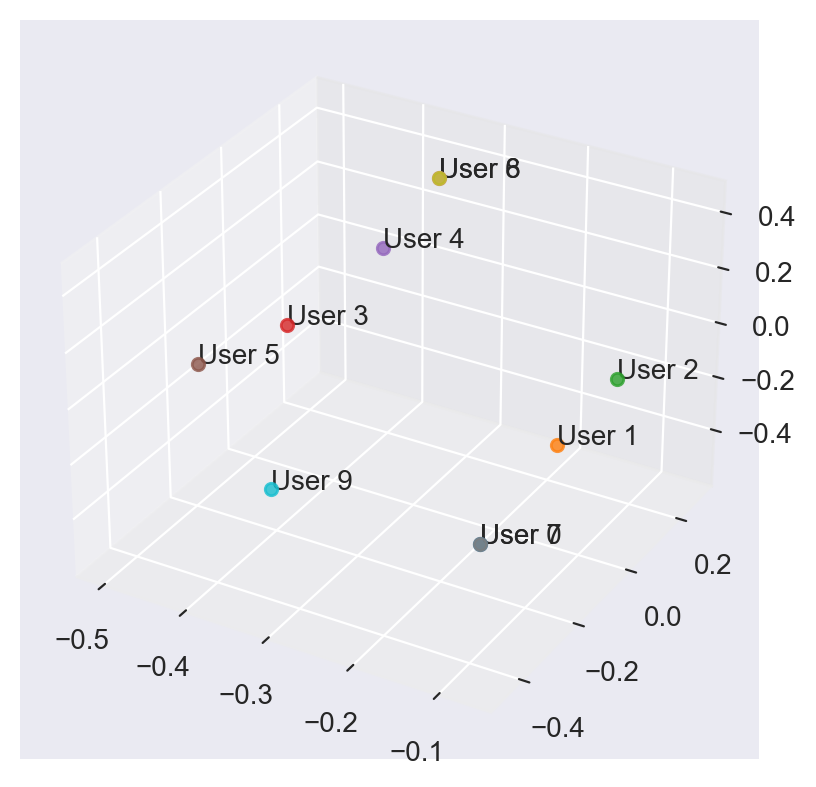

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# plt.style.use("seaborn")
plt.style.use("seaborn-darkgrid")

def plot_data(mat, data_type, camera=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    if camera != None:
        ax.view_init(elev=camera[0], azim=camera[1])
    for index, row in mat.iterrows():
        ax.scatter(row[0], row[1], row[2], alpha=0.8)
        ax.text(row[0], row[1], row[2],'{0} {1}'.format(data_type, index), size=10)
    plt.show()


plot_data(U, "User")
plt.show()

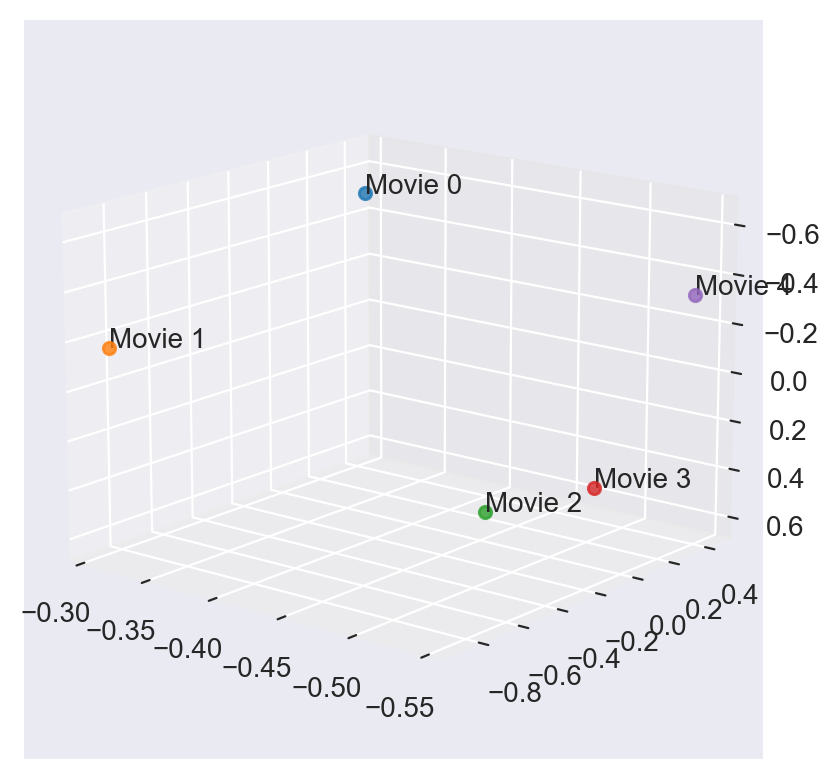

In [8]:
plot_data(VT.T, "Movie", [-164.5, 51.25])